# SimTool Test

Test of a simulation tool that accepts a bunch of different input types and writes different outputs.

In [1]:
DESCRIPTION = "Sample notebook testing and documentation"

In [1]:
%load_ext yamlmagic
import numpy as np
from simtool import DB

In [ ]:
EXTRA_FILES = ["nanoHUB_logo_color.png"]

In [2]:
%%yaml INPUTS

some_text:
    desc: Text to Write in Output Image
    type: Text
    maxlen: 20
    value: 'Default Text'
    
volts:
    desc: Value to Write in Output Image
    type: Number
    units: mV
    value: 0
    max: 1000

width:
    desc: Width of Output Image in pixels
    type: Integer
    value: 400
    min: 100
    max: 2000
    
height:
    desc: Height of Output Image in pixels
    type: Integer
    value: 200
    min: 50
    max: 1000

position:
    desc: Position of text in image [x, y] in pixels
    type: List
    value: [20, 20]

options:
    desc: Color and Font Size Options.
    type: Dict
    value: {'FontSize': 28, 'FontColor': 'red', 'Background': 'black'}
    
myarray:
    type: Array
    dim: 1

<IPython.core.display.Javascript object>

In [3]:
%%yaml OUTPUTS

volts:
    desc: Input 'volts' returned from SimTool
    type: Number
    units: mV

myarray:
    desc: The array that was input, doubled.
    type: Array

PNG:
    desc: Image as a PNG
    type: Image

JPG:
    desc: Image as a JPG
    type: Image

GIF:
    desc: Image as a GIF
    type: Image
    
nanohub:
    desc: Our logo!
    type: Image

<IPython.core.display.Javascript object>

In [4]:
some_text = 'Hello'
volts = 200
width = 400
height = 200
fontsize = 28
position = [20, 20]
options = {'FontSize': 40, 'FontColor': 'red', 'Background': 'black'}
myarray = np.arange(0,10,.2)

**** Computation is Done Below ****

In [5]:
db = DB(OUTPUTS)
db.save('volts', volts)

In [6]:
db.save('volts', volts, display=True)

200

In [7]:
# arrays are passed to notebook as lists.  Convert it
myarray = np.array(myarray)
db.save('myarray', myarray * 2)
db.save('myarray', myarray * 4.1, display=True)

array([ 0.  ,  0.82,  1.64,  2.46,  3.28,  4.1 ,  4.92,  5.74,  6.56,
        7.38,  8.2 ,  9.02,  9.84, 10.66, 11.48, 12.3 , 13.12, 13.94,
       14.76, 15.58, 16.4 , 17.22, 18.04, 18.86, 19.68, 20.5 , 21.32,
       22.14, 22.96, 23.78, 24.6 , 25.42, 26.24, 27.06, 27.88, 28.7 ,
       29.52, 30.34, 31.16, 31.98, 32.8 , 33.62, 34.44, 35.26, 36.08,
       36.9 , 37.72, 38.54, 39.36, 40.18])

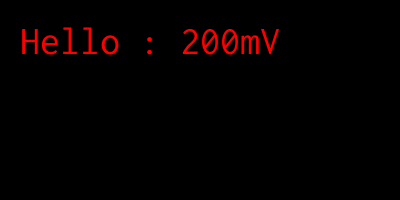

In [8]:
# Generate output images for our SimTool based on input parameters
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont

img = PIL.Image.new('RGB', (width, height), color=options['Background'])
d = PIL.ImageDraw.Draw(img)
try:
    font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/inconsolata/Inconsolata.otf", options['FontSize'], encoding="unic")
except:
    font = PIL.ImageFont.load_default()
d.text(position, '%s : %smV' % (some_text, volts), font=font, fill=options['FontColor'])
img.save('foo.png')
db.save('PNG', file='foo.png', display=True)

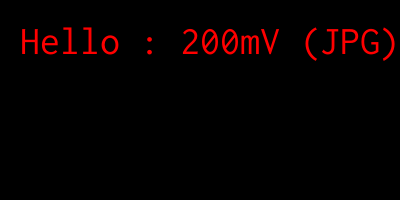

In [9]:
img = PIL.Image.new('RGB', (width, height), color=options['Background'])
d = PIL.ImageDraw.Draw(img)
d.text(position, '%s : %smV (JPG)' % (some_text, volts), font=font, fill=options['FontColor'])
# img.save('foo.jpg')
db.save('JPG', img, display=True)

In [10]:
img = PIL.Image.new('RGB', (width, height), color=options['Background'])
d = PIL.ImageDraw.Draw(img)
d.text(position, '%s : %smV (GIF)' % (some_text, volts), font=font, fill=options['FontColor'])
img.save('foo.gif')
db.save('GIF', file='foo.gif')

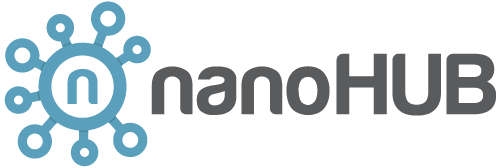

In [12]:
db.save('nanohub', file='nanoHUB_logo_color.png', display=True)